In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

#algoritmos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#metricas de performance
from sklearn.metrics import mean_squared_error, r2_score

In [135]:
df = pd.read_csv("dataframe_exercicio_modulo_9.csv")
df

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,GT3,T,1,3,no,no,no,yes,yes,no,5,4,2,4,10
1040,F,18,LE3,T,1,2,no,yes,no,no,yes,no,4,3,4,4,16
1041,F,18,GT3,T,2,2,no,no,no,yes,no,no,1,1,1,6,9
1042,M,17,LE3,T,2,1,no,no,no,no,yes,no,2,4,5,6,10


Atributos do dataset:
    
    1- 'sex': sexo
    
    2- 'age': idade
    
    3- 'famsize': tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário
    
    4- 'Pstatus': status de habitação com os pais; T - mora junto com os pais, A - mora separado;
    
    5- 'traveltime': tempo de viagem entre escola e casa; 
        1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora
        
    6- 'studytime': tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas
    
    7- 'schoolsup': suporte educacional extra escola
    
    8- 'famsup': suporte educacional da família
    
    9- 'paid': pagou aulas particulares por fora 
    
    10- 'activities': atividades extra-curriculares
    
    11- 'internet': acesso a internet em casa
    
    12- 'romantic': se está num relacionamento
    
    13- 'famrel': qualidade das relações familiares; 1 - muito ruim a 5 - muito boa
    
    14- 'freetime': tempo livre após escola; 1 - muito pouco até 5 - muito
    
    15- 'goout': relaciona-se com amigos; 1 - muito pouco até 5 - muito
    
    16- 'absences': quantidade de faltas na escola
    
    17- 'G3': nota média final no ensino médio
    
<br>

No dataset acima, faça uma __análise exploratória__ geral, bem como __pré-processamentos__ nas variáveis.

Considere a variável __'G3'__ como a __variável target__ do problema - contexto de __regressão.__

Teste __diferentes modelos de regressão__ a fim de explicar a variável target. Use a metodologia da __validação cruzada__ e o __coeficiente de determinação ($R^{2}$)__ como métrica de performance.

Plote __gráficos__ personalizados com os resultados.

In [136]:
# analisando a composição do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   famsize     1044 non-null   object
 3   Pstatus     1044 non-null   object
 4   traveltime  1044 non-null   int64 
 5   studytime   1044 non-null   int64 
 6   schoolsup   1044 non-null   object
 7   famsup      1044 non-null   object
 8   paid        1044 non-null   object
 9   activities  1044 non-null   object
 10  internet    1044 non-null   object
 11  romantic    1044 non-null   object
 12  famrel      1044 non-null   int64 
 13  freetime    1044 non-null   int64 
 14  goout       1044 non-null   int64 
 15  absences    1044 non-null   int64 
 16  G3          1044 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 138.8+ KB


In [138]:
df.isnull().sum()

sex           0
age           0
famsize       0
Pstatus       0
traveltime    0
studytime     0
schoolsup     0
famsup        0
paid          0
activities    0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
absences      0
G3            0
dtype: int64

### Tratamento:

 - 'schoolsup': suporte educacional extra escola
 - 'famsup': suporte educacional da família
 - 'paid': pagou aulas particulares por fora 
 - 'activities': atividades extra-curriculares
 - 'internet': acesso a internet em casa
 - 'romantic': se está num relacionamento

In [139]:
print(f'schoolsup: {sorted(df.schoolsup.unique())}')
print(f'famsup: {sorted(df.famsup.unique())}')
print(f'paid: {sorted(df.paid.unique())}')
print(f'activities: {sorted(df.activities.unique())}')
print(f'internet: {sorted(df.internet.unique())}')
print(f'romantic: {sorted(df.romantic.unique())}')

schoolsup: ['no', 'yes']
famsup: ['no', 'yes']
paid: ['no', 'yes']
activities: ['no', 'yes']
internet: ['no', 'yes']
romantic: ['no', 'yes']


In [140]:
df['schoolsup'] = df['schoolsup'].apply(lambda item: 0 if item == 'no' else 1)
df['famsup'] = df['famsup'].apply(lambda item: 0 if item == 'no' else 1)
df['paid'] = df['paid'].apply(lambda item: 0 if item == 'no' else 1)
df['activities'] = df['activities'].apply(lambda item: 0 if item == 'no' else 1)
df['internet'] = df['internet'].apply(lambda item: 0 if item == 'no' else 1)
df['romantic'] = df['romantic'].apply(lambda item: 0 if item == 'no' else 1)

In [141]:
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,1,0,0,0,0,0,4,3,4,6,6
1,F,17,GT3,T,1,2,0,1,0,0,1,0,5,3,3,4,6
2,F,15,LE3,T,1,2,1,0,1,0,1,0,4,3,2,10,10
3,F,15,GT3,T,1,3,0,1,1,1,1,1,3,2,2,2,15
4,F,16,GT3,T,1,2,0,1,1,0,0,0,4,3,2,4,10


### Tratamento:

 - 'Pstatus': status de habitação com os pais; T - mora junto com os pais, A - mora separado.

In [142]:
sorted(df.Pstatus.unique())

['A', 'T']

In [143]:
df['Pstatus'] = df['Pstatus'].apply(lambda item: 0 if item == 'A' else 1)

In [144]:
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,0,2,2,1,0,0,0,0,0,4,3,4,6,6
1,F,17,GT3,1,1,2,0,1,0,0,1,0,5,3,3,4,6
2,F,15,LE3,1,1,2,1,0,1,0,1,0,4,3,2,10,10
3,F,15,GT3,1,1,3,0,1,1,1,1,1,3,2,2,2,15
4,F,16,GT3,1,1,2,0,1,1,0,0,0,4,3,2,4,10


### Tratamento:

 - 'sex': Sexo; M - masculino, F - feminino.

In [145]:
df['sex'] = df['sex'].apply(lambda item: 0 if item == 'F' else 1)

In [146]:
#verificando o tratamento dos dados
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,0,18,GT3,0,2,2,1,0,0,0,0,0,4,3,4,6,6
1,0,17,GT3,1,1,2,0,1,0,0,1,0,5,3,3,4,6
2,0,15,LE3,1,1,2,1,0,1,0,1,0,4,3,2,10,10
3,0,15,GT3,1,1,3,0,1,1,1,1,1,3,2,2,2,15
4,0,16,GT3,1,1,2,0,1,1,0,0,0,4,3,2,4,10


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   int64 
 1   age         1044 non-null   int64 
 2   famsize     1044 non-null   object
 3   Pstatus     1044 non-null   int64 
 4   traveltime  1044 non-null   int64 
 5   studytime   1044 non-null   int64 
 6   schoolsup   1044 non-null   int64 
 7   famsup      1044 non-null   int64 
 8   paid        1044 non-null   int64 
 9   activities  1044 non-null   int64 
 10  internet    1044 non-null   int64 
 11  romantic    1044 non-null   int64 
 12  famrel      1044 non-null   int64 
 13  freetime    1044 non-null   int64 
 14  goout       1044 non-null   int64 
 15  absences    1044 non-null   int64 
 16  G3          1044 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 138.8+ KB


In [148]:
#verificando a correlação com a variável target
df.corr()['G3']

sex          -0.031472
age          -0.125282
Pstatus      -0.030693
traveltime   -0.102627
studytime     0.161629
schoolsup    -0.079346
famsup        0.013313
paid         -0.049388
activities    0.033998
internet      0.107064
romantic     -0.098363
famrel        0.054461
freetime     -0.064890
goout        -0.097877
absences     -0.045671
G3            1.000000
Name: G3, dtype: float64

In [149]:
# separação de 25% dos dados para teste

dftrain, dftest = train_test_split(df, test_size = 0.25, random_state = 0)
print(df.shape)
print(dftrain.shape)
print(dftest.shape)

(1044, 17)
(783, 17)
(261, 17)


 > Encapsular etapas numa função única de processamento dos dados, a fim de automatizar o processo:

In [154]:
def preprocessamento_completo(df, dataset_de_treino = True, cat_encoder = None, std_scaler = None):

    dff = df.copy()
    
    variaveis_para_normalizar = ['age',
                                 'traveltime',
                                 'studytime',
                                 'famrel',
                                 'freetime',
                                 'goout',
                                 'absences']

    if dataset_de_treino:  
        
        #OHE
        encoder = OneHotEncoder()
        df_famsize_OHE = encoder.fit_transform(dff[['famsize']]).toarray()
        

        #normalização
        sc = StandardScaler()
        variaveis_norm = sc.fit_transform(dff[variaveis_para_normalizar])
        
        X, y =  np.c_[df_famsize_OHE, variaveis_norm], dff.G3.values
        return X, y, encoder, sc
    
    else:
        #OHE
        df_famsize_OHE = cat_encoder.transform(dff[['famsize']]).toarray()
        
        #normalização
        variaveis_norm = std_scaler.transform(dff[variaveis_para_normalizar]) 
        
        X, y =  np.c_[df_famsize_OHE, variaveis_norm], dff.G3.values
        return X, y

In [155]:
Xtrain, ytrain, encoder_train, scaler_train  = preprocessamento_completo(df = dftrain, 
                                                                         dataset_de_treino = True, 
                                                                         cat_encoder = None, 
                                                                         std_scaler = None)

A função acima, além de retornar os arrays Xtrain, ytrain já devidamente preprocessados e prontos para serem consumidos pelos modelos de aprendizado de máquina, retornam os objetos encoder_train e scaler_train, que foram fitados com as informações advindas do dataset de treino - dftrain

In [156]:
Xtrain.shape, ytrain.shape, dftrain.shape

((783, 9), (783,), (783, 17))

In [157]:
# Abaixo, iremos aplicar as transformações no dataset de teste - dataset que iremos usar apenas no final do notebook, 
# após a escolha do modelo de aprendizado de máquina final.
Xtest, ytest = preprocessamento_completo(df = dftest, 
                                         dataset_de_treino = False, 
                                         cat_encoder = encoder_train, 
                                         std_scaler = scaler_train)

In [158]:
Xtest.shape, ytest.shape, dftest.shape

((261, 9), (261,), (261, 17))

In [159]:
# construir as métricas de performance que iremos acompanhar.
def RMSE(ytrue, ypred):
    return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))

In [160]:
# Vamos começar por treinar o modelo de regressão linear nos dados e avaliar o RMSE e o R2 nos dados de treino:
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain)

LinearRegression()

In [161]:
RMSE(ytrue = ytrain, ypred = lin_reg.predict(Xtrain))

3.917886656283651

In [162]:
r2_score(y_true=ytrain, y_pred=lin_reg.predict(Xtrain))

0.06075936041844121

In [163]:
# Agora, vamos testar algumas versões do KNN, considerando diferentes números de vizinhos.
# Iremos também testar algumas versões das árvores de decisão - para fins de comparação.

num_vizinhos = [1, 2, 5, 10, 20, 50]

for n in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(Xtrain, ytrain)
    
    preds = knn.predict(Xtrain)
    
    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)
    
    print("K = " + str(n) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

K = 1 | RMSE:1.67 / R2: 0.83
K = 2 | RMSE:2.67 / R2: 0.56
K = 5 | RMSE:3.5 / R2: 0.25
K = 10 | RMSE:3.71 / R2: 0.16
K = 20 | RMSE:3.78 / R2: 0.13
K = 50 | RMSE:3.86 / R2: 0.09


In [164]:
# hiperparâmetro max_depth, que seria a "profundidade da árvore"

max_profundidades = [1, 5, 10, 100]

for m in max_profundidades:
    dt = DecisionTreeRegressor(max_depth = m)
    dt.fit(Xtrain, ytrain)
    
    preds = dt.predict(Xtrain)
    
    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)
    
    print("Profundidade da árvore = " + str(m) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

Profundidade da árvore = 1 | RMSE:4.0 / R2: 0.02
Profundidade da árvore = 5 | RMSE:3.62 / R2: 0.2
Profundidade da árvore = 10 | RMSE:2.45 / R2: 0.63
Profundidade da árvore = 100 | RMSE:1.18 / R2: 0.92


In [165]:
# aplicação da validação cruzada para a regressão linear em nosso problema, 
# considerando 5 folds e o R2 como a métrica de performance a ser medida

cv_lin_reg = cross_val_score(estimator = LinearRegression(), 
                             X = Xtrain, 
                             y = ytrain, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_lin_reg)
print('media: ', cv_lin_reg.mean())
print('desvio padrão: ', cv_lin_reg.std())

[ 0.0432027   0.05660151  0.05030476 -0.02897575  0.05539532]
media:  0.035305709158036325
desvio padrão:  0.03248551708853184


In [166]:
# criar uma função para facilitar nossas análises dos modelos:

def cross_validation_R2_results(modelo, nome_modelo, X, y, num_folds):
    cv_results = cross_val_score(estimator = modelo, 
                                 X = Xtrain, 
                                 y = ytrain, 
                                 cv = num_folds, 
                                 scoring = 'r2') 
    modelo.fit(Xtrain, ytrain)
    r2_train = r2_score(y_true=ytrain, y_pred=modelo.predict(Xtrain))
    plt.figure(figsize=[8,6])
    plt.scatter(range(1, 1+num_folds), cv_results, c = 'blue', s = 100)
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold')
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.plot(range(1, 1+num_folds), [cv_results.mean()] * num_folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')
    
    
    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '-1 desv. padrão margem')
    
    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
    plt.ylim([0,1.05])
    plt.grid()
    plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)),
              fontsize = 14, fontweight = 'bold')
    plt.show()

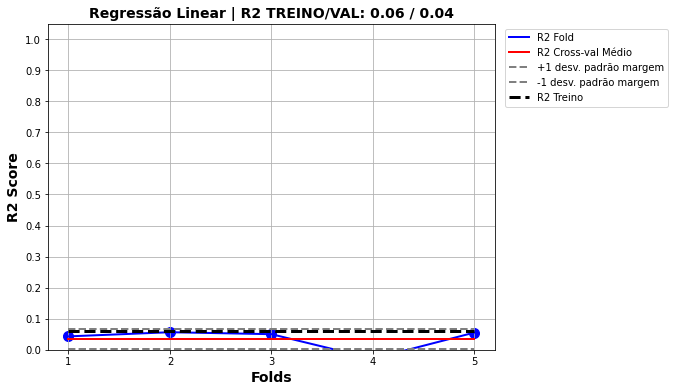

In [167]:
# Aplicando a função acima nos modelos que estamos considerando:

cross_validation_R2_results(modelo = LinearRegression(),
                           nome_modelo = 'Regressão Linear',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

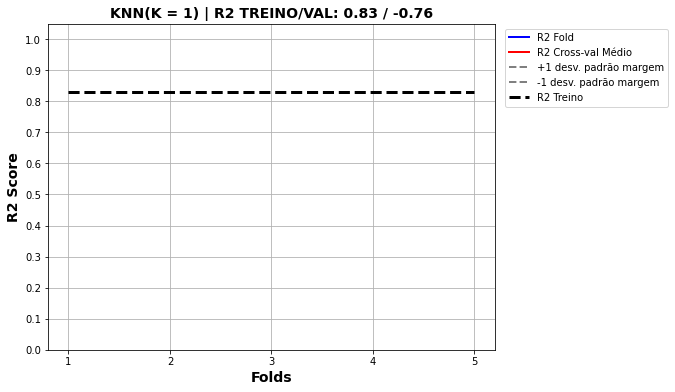

In [168]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 1),
                           nome_modelo = 'KNN(K = 1)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

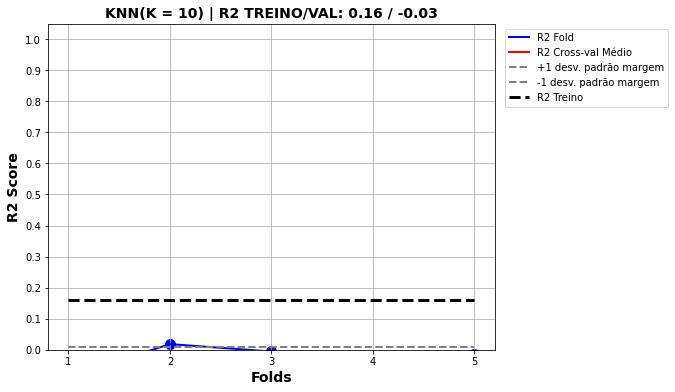

In [169]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 10),
                           nome_modelo = 'KNN(K = 10)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

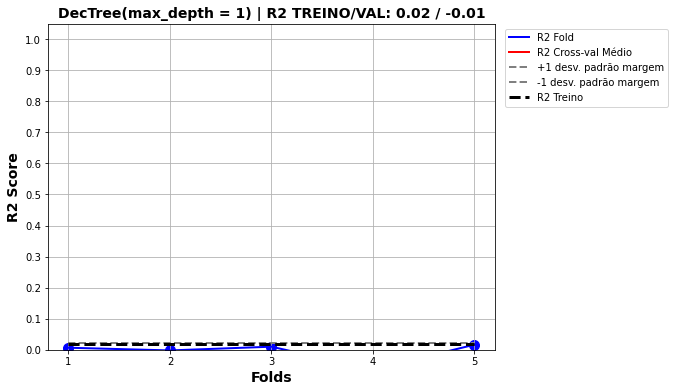

In [170]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 1),
                           nome_modelo = 'DecTree(max_depth = 1)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

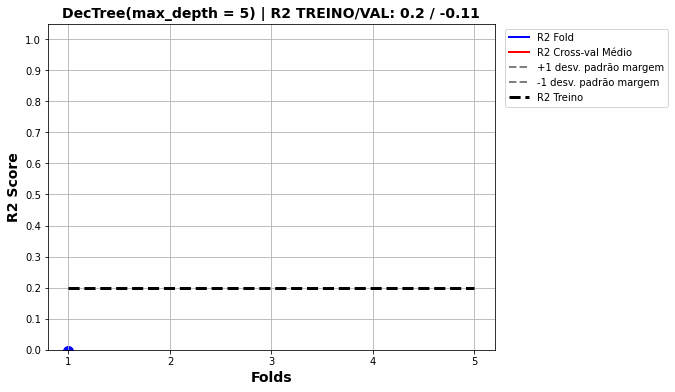

In [171]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 5),
                           nome_modelo = 'DecTree(max_depth = 5)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

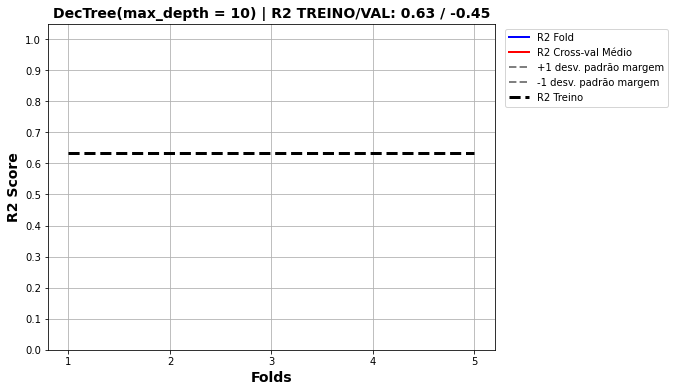

In [172]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 10),
                           nome_modelo = 'DecTree(max_depth = 10)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

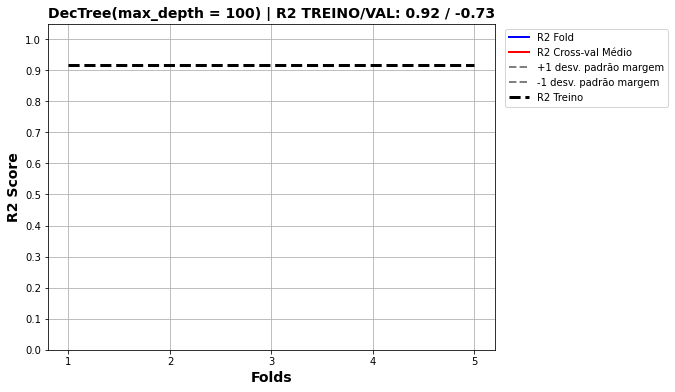

In [173]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 100),
                           nome_modelo = 'DecTree(max_depth = 100)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

Diante dos resultados acima, vemos que as instâncias do KNN e das árvores de decisão estão realmente overfitando os dados de treino.

Além disso, vemos que a regressão linear obteve uma performance um pouco melhor.

Desta forma, vamos considerar que nosso modelo final é o 'Regressão Linear'.

Nesta etapa final, vamos treiná-la novamente, usando todo o conjunto de treinamento e finalmente iremos avaliar as métricas (R2) no conjunto de teste:

In [174]:
modelo_final = LinearRegression()
modelo_final.fit(Xtrain, ytrain)

LinearRegression()

In [175]:
preds_modelo_final = modelo_final.predict(Xtest)

In [176]:
#R2 em teste

r2_score(y_true = ytest, y_pred = preds_modelo_final)

0.04388355020706547

In [177]:
rmse_teste_final = RMSE(ytrue = ytest, ypred = preds_modelo_final)
rmse_teste_final

3.1787767174230543

Para finalizar as análises, vamos olhar a dispersão dos preços reais no dataset de teste comparado com os preços preditos pelo modelo; vamos também calcular o RMSE para quantificar, em média, qual o tamanho do erro desses preços:

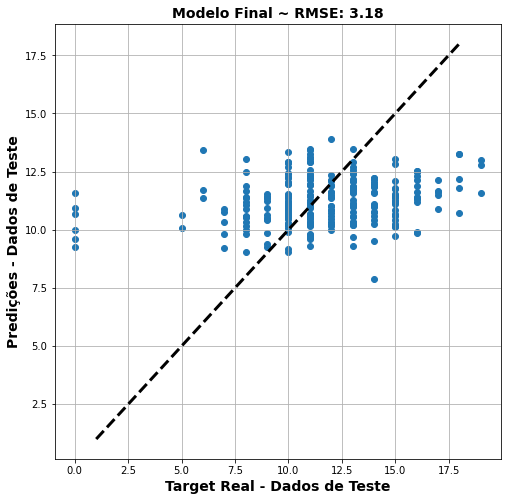

In [178]:
plt.figure(figsize=[8,8])
plt.title("Modelo Final ~ RMSE: " + str(np.round(rmse_teste_final,2)), fontweight = 'bold', fontsize = 14)
plt.scatter(ytest, preds_modelo_final)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.ylabel("Predições - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.grid()
range_line = int(np.maximum(max(ytest), max(preds_modelo_final)))
plt.plot(range(1, range_line), range(1, range_line), '--' ,c = 'black', lw = 3)
plt.show()

Conclusão: o modelo de predição não funcionou, provavelmente porque a relação entre as variáveis é baixa.

---